In [26]:
import json
import os
import pickle

In [27]:
encoder = None
encoders = {}
labelsDescription = {}
skinType = None
isSensitive = None
mainProblem = None
secondProblem = None
age = None
resultSkinCare = {}
models = {}
accuracy = {}
products = {}
link = None
chosenProduct = None

accuracyDecisionTree = {}
accuracyKNN = {}
accuracyRandomForest = {}

allAccuracy = {}

askedColumnNames = ['Typ cery', 'Główny problem', 'Poboczny problem', 'Wrażliwa','Wiek']
categoricalColumnNames = ['Typ cery', 'Główny problem', 'Poboczny problem']
DECISION_COLUMN_NAMES = ['Mycie','Serum na dzień','Krem na dzień','SPF','Serum na noc','Krem na noc','Punktowo','Maseczka','Peeling']
allColumns = askedColumnNames + DECISION_COLUMN_NAMES
allCategoricalColumns = categoricalColumnNames + DECISION_COLUMN_NAMES

In [28]:
with open("../../prepared_data/accuracy.json") as json_file:
    data = json.load(json_file)
    for key in data:
        accuracy[key] = data[key]

for key in accuracy:
    print(key, accuracy[key])

Mycie 0.1724137931034483
Serum na dzień 0.2222222222222222
Krem na dzień 0.1685823754789272
SPF 0.31724137931034485
Serum na noc 0.31494252873563217
Krem na noc 0.1425287356321839
Punktowo 0.4114942528735632
Maseczka 0.3057471264367816
Peeling 0.31340996168582375


In [29]:
with open('../accuracy_of_all_models/accuracy_of_DecisionTreeClassifier.json') as json_file:
    data = json.load(json_file)
    for key in data:
        accuracyDecisionTree[key] = data[key]

for key in accuracyDecisionTree:
    print(accuracyDecisionTree[key])


0.1532567049808429
0.19693486590038314
0.16475095785440613
0.29195402298850576
0.31494252873563217
0.13486590038314175
0.4061302681992337
0.30344827586206896
0.28735632183908044


In [30]:
with open('../accuracy_of_all_models/accuracy_of_KNeighborsClassifier.json') as json_file:
    data = json.load(json_file)
    for key in data:
        accuracyKNN[key] = data[key]

for key in accuracyKNN:
    print(accuracyKNN[key])

0.16015325670498085
0.2222222222222222
0.15402298850574714
0.26590038314176245
0.2597701149425287
0.13409961685823754
0.3992337164750958
0.2835249042145594
0.30114942528735633


In [31]:
with open('../accuracy_of_all_models/accuracy_of_RandomForestClassifier.json') as json_file:
    data = json.load(json_file)
    for key in data:
        accuracyRandomForest[key] = data[key]

for key in accuracyRandomForest:
    print(accuracyRandomForest[key])

0.1724137931034483
0.2168582375478927
0.1685823754789272
0.31724137931034485
0.3103448275862069
0.1425287356321839
0.4114942528735632
0.3057471264367816
0.31340996168582375


Wyświetlenie wykresów dokładności trzech modeli

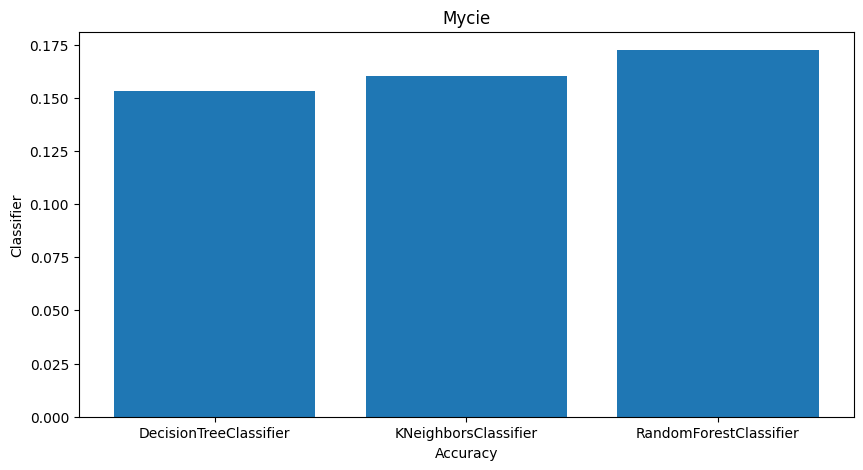

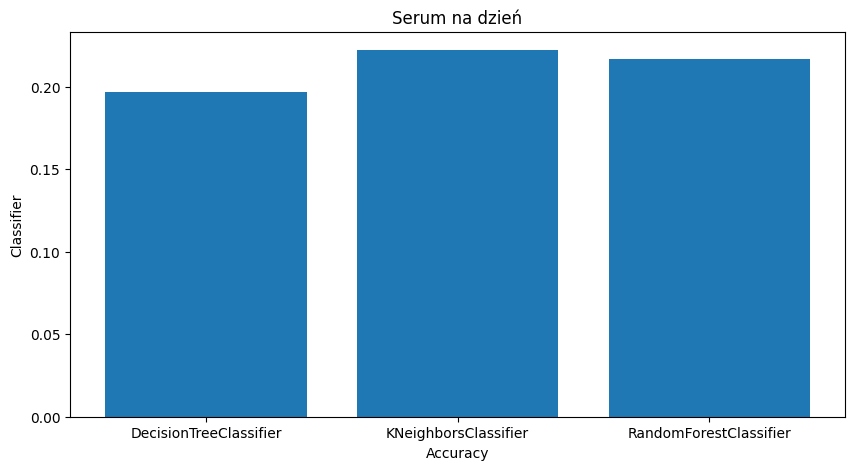

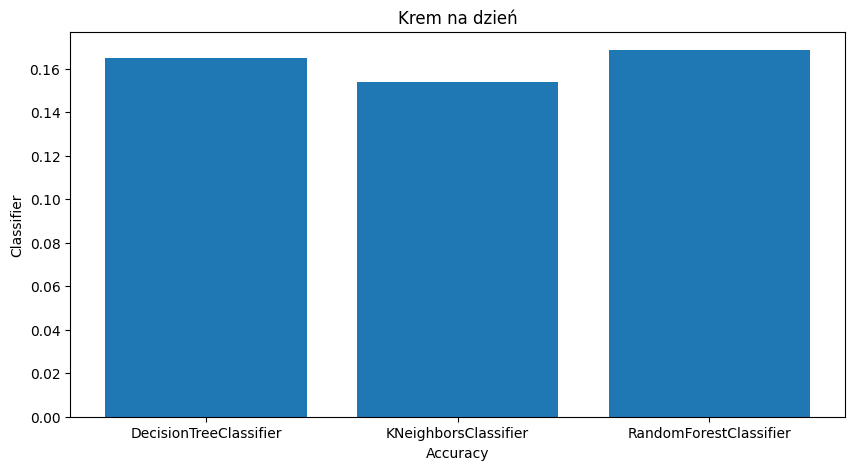

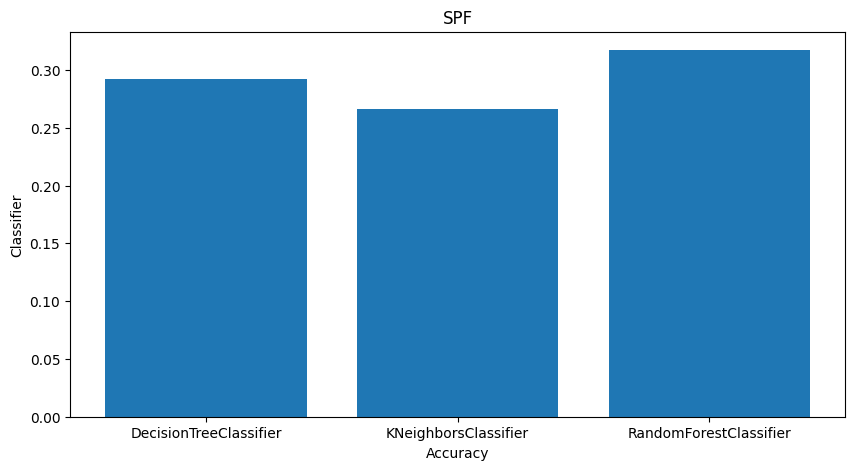

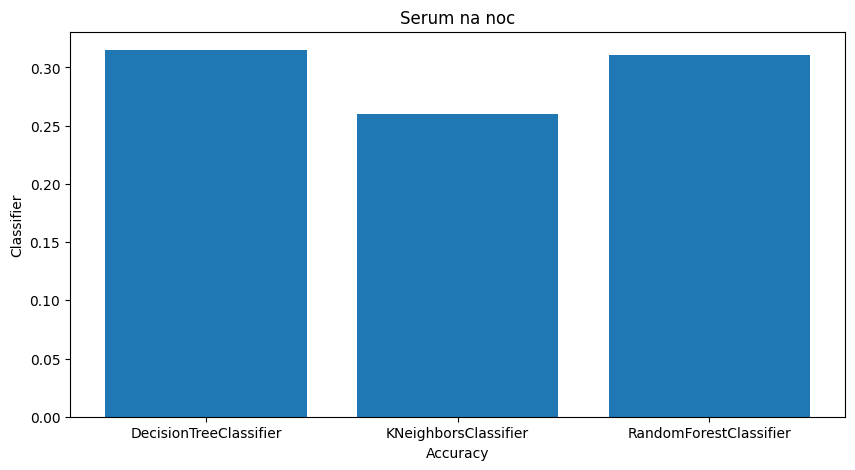

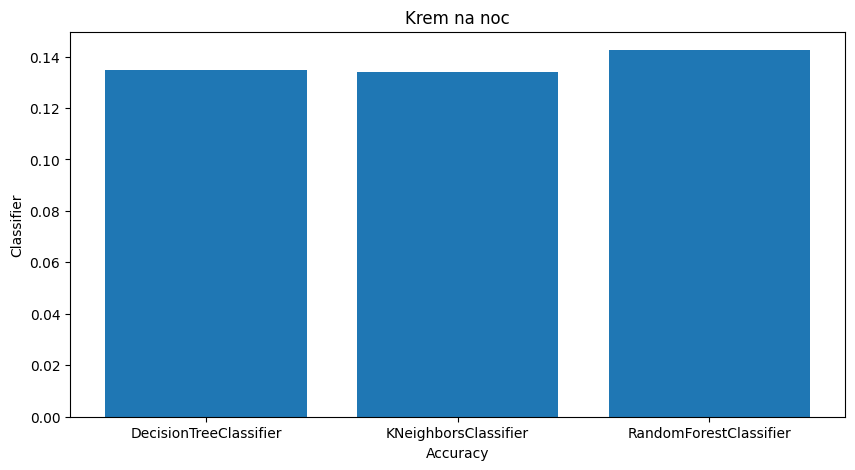

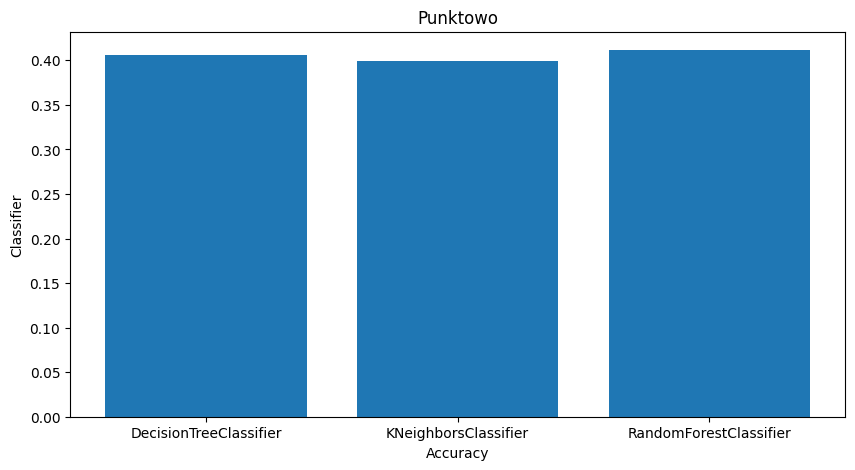

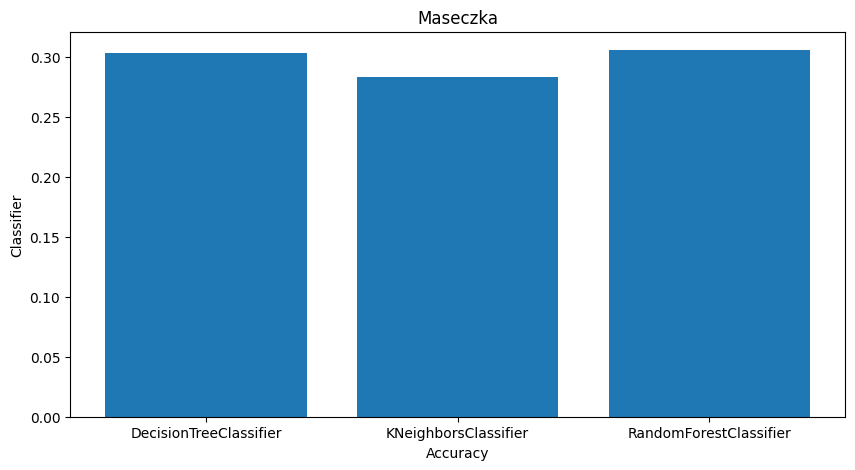

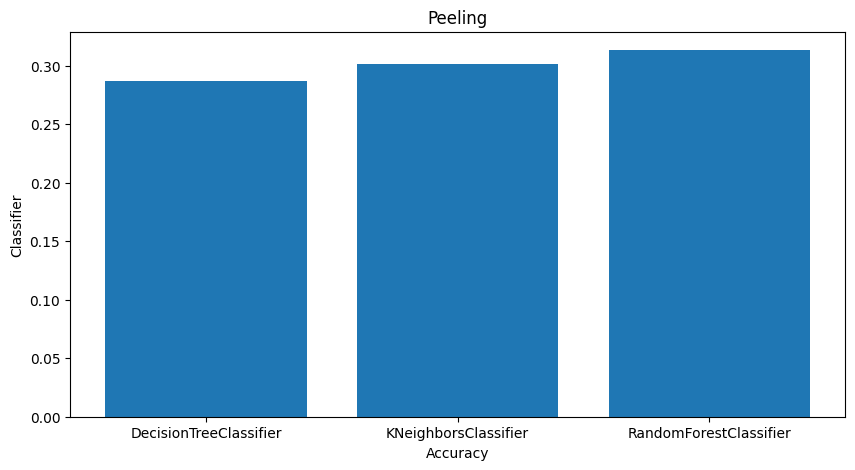

In [32]:
for key in accuracyDecisionTree:
    allAccuracy[key] = [accuracyDecisionTree[key], accuracyKNN[key], accuracyRandomForest[key]]

import matplotlib.pyplot as plt
import numpy as np

for key in allAccuracy:
    plt.figure(figsize=(10, 5))
    plt.title(key)
    plt.xlabel('Accuracy')
    plt.ylabel('Classifier')
    plt.bar(['DecisionTreeClassifier', 'KNeighborsClassifier', 'RandomForestClassifier'], allAccuracy[key])
    plt.show()

In [36]:
def read_models_for_analysis(filename, i):
    temp_dict = {}
    with open("../models_for_analysis/{0}/{1}".format(i, filename), "rb") as file:
        temp_dict[filename] = pickle.load(file)
    return temp_dict

Wyświetlenie wszystkich najlepszych modeli i ich parametrów

In [37]:
for i in range(9):
    temp_list = [read_models_for_analysis(filename, i) for filename in os.listdir('../models_for_analysis/{0}'.format(i))]
    models[i] = temp_list
models

{0: [{'DecisionTreeClassifier.hdf5': DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=8)},
  {'KNeighborsClassifier.hdf5': KNeighborsClassifier(n_neighbors=19)},
  {'RandomForestClassifier.hdf5': RandomForestClassifier(criterion='entropy', max_depth=38, max_features='auto',
                          min_samples_leaf=9, min_samples_split=3,
                          n_estimators=200)}],
 1: [{'DecisionTreeClassifier.hdf5': DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=8,
                          min_samples_split=5)},
  {'KNeighborsClassifier.hdf5': KNeighborsClassifier(n_neighbors=18)},
  {'RandomForestClassifier.hdf5': RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=9,
                          n_estimators=400)}],
 2: [{'DecisionTreeClassifier.hdf5': DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3)},
  {'KNeighborsClassifier.hdf5': KNeighborsClassifier(metric='manhattan', n_n